In [1]:
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import matplotlib.pyplot as plt

# Open the full dataset covering the pacific northwestern US

In [21]:
ds = xr.open_dataset('./data/tmean_small.nc')
# Set crs for lat lons (http://www.lavykim.com/wp1/archives/340)
ds = ds.rio.write_crs(4326)
ds

<xarray.Dataset>
Dimensions:      (lat: 190, lon: 239, time: 48)
Coordinates:
  * lat          (lat) float64 41.03 41.09 41.16 41.22 ... 52.72 52.78 52.84
  * lon          (lon) float64 -124.6 -124.5 -124.5 ... -109.8 -109.8 -109.7
  * time         (time) datetime64[ns] 1950-01-01 1950-01-02 ... 1950-02-17
    spatial_ref  int64 0
Data variables:
    tmean        (time, lat, lon) float32 ...
Attributes:
    sources:             Livneh et al., 2013
    projection:          Geographic
    SurfSgn_convention:  Traditional
    LIVNEH_VERSION_ID:   1.2
    institution:         Dataset provided by NOAA/ESRL PSD
    citation:            Livneh B, E.A. Rosenberg, C. Lin, B. Nijssen, V. Mis...
    Conventions:         CF-1.2
    history:             Created at NOAA/ESRL PSD 2015/03/20 using files obta...
    References:          http://www.esrl.noaa.gov/psd/data/gridded/data.livne...
    dataset_title:       Livneh daily CONUS near-surface gridded meteorologic...

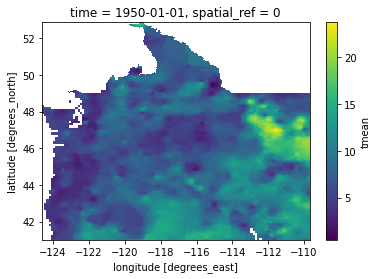

In [22]:
ds['tmean'].isel(time=0).plot()

# Read in the shapefiles covering the Yakima and Deschutes river basins

In [23]:
yak_gdf = gpd.GeoDataFrame.from_file('./data/gis_data/yakima_hru.shp')
des_gdf = gpd.GeoDataFrame.from_file('./data/gis_data/deschutes_hru.shp')
yak_gdf.head()

,hru_id2,LtHtTtl,swe1,swe2,swe3,swe4,swe5,swe6,swe7,swe8,swe9,swe10,swe11,swe12,geometry
0,17006965,-70.885145,1.062570e-05,3.151881e-01,1.076094,4.264101,48.517270,118.789648,149.229173,106.037134,0.569133,0.0,0.0,0.0,"POLYGON ((-1896164.885 2806972.492, -1896164.9..."
1,17006967,-70.756318,1.380207e-05,3.287938e-01,1.083244,4.334746,48.683195,119.368388,149.866875,109.209687,0.890747,0.0,0.0,0.0,"POLYGON ((-1899104.922 2809935.120, -1899105.0..."
2,17006969,-21.841824,7.408289e-07,1.260365e-08,0.261100,0.186231,2.130178,0.064254,0.000000,0.000000,0.000000,0.0,0.0,0.0,"MULTIPOLYGON (((-1794194.990 2810024.780, -179..."
3,17006970,-24.022237,2.803561e-06,1.729645e-09,0.215585,0.138329,2.044203,0.058820,0.000000,0.000000,0.000000,0.0,0.0,0.0,"POLYGON ((-1799895.014 2811751.000, -1799894.8..."
4,17006971,-33.001100,5.020043e-07,2.171486e-08,0.130928,0.090587,1.870962,0.118715,0.000000,0.000000,0.000000,0.0,0.0,0.0,"POLYGON ((-1831545.141 2812184.925, -1831544.8..."


<AxesSubplot:>

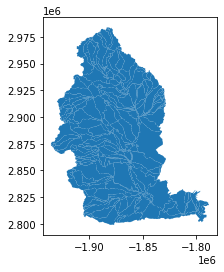

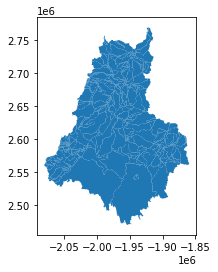

In [24]:
yak_gdf.plot()
des_gdf.plot()

# Clip out the Yakima River Valley from the full dataset

In [25]:
yakima_ds = ds.rio.clip(yak_gdf.geometry.values, yak_gdf.crs)
deschutes_ds = ds.rio.clip(des_gdf.geometry.values, des_gdf.crs)

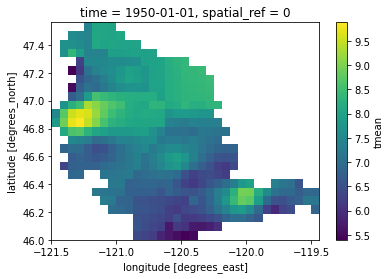

In [26]:
yakima_ds['tmean'].isel(time=0).plot()

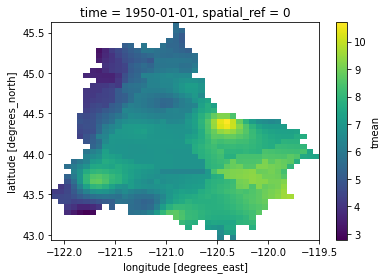

In [27]:
deschutes_ds['tmean'].isel(time=0).plot()

# Now take the spatial means and compare timeseries

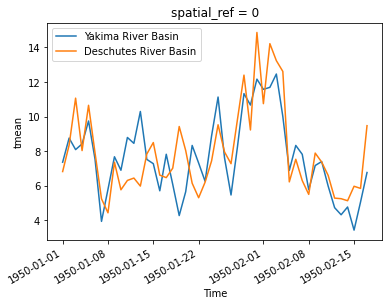

In [33]:
yakima_ds['tmean'].mean(dim=['lat', 'lon']).plot(label='Yakima River Basin')
deschutes_ds['tmean'].mean(dim=['lat', 'lon']).plot(label='Deschutes River Basin')
plt.legend()